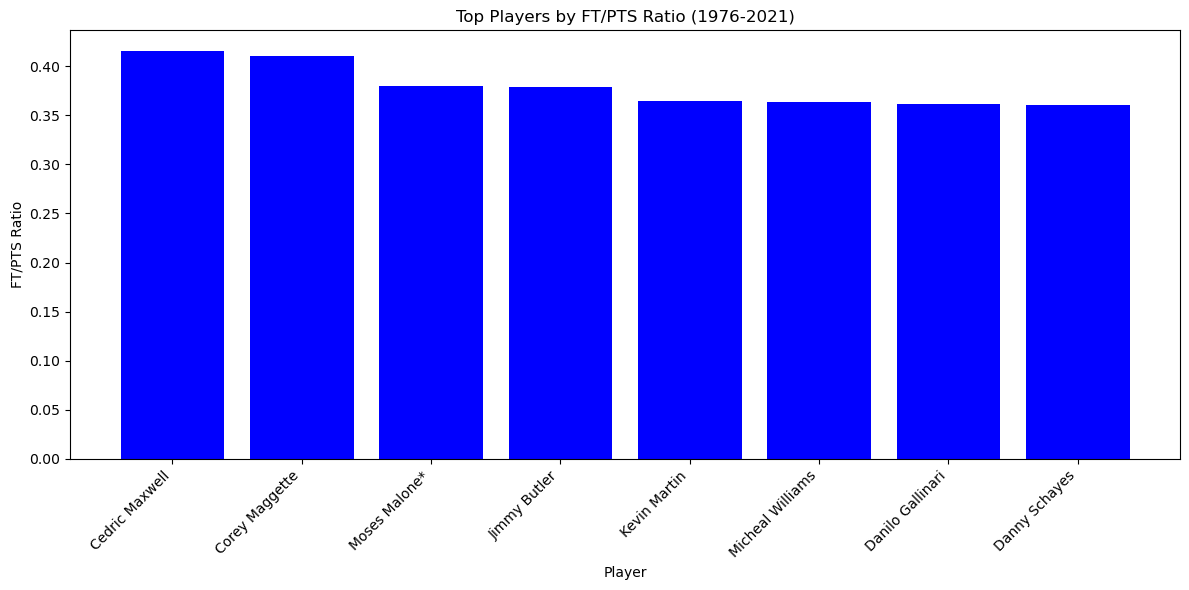

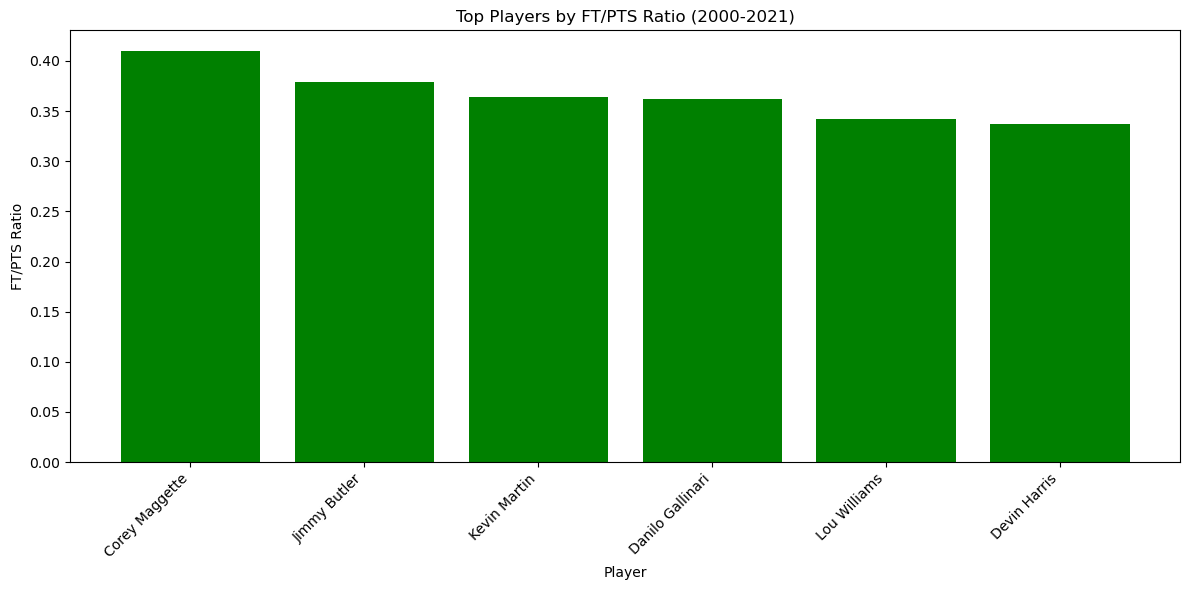

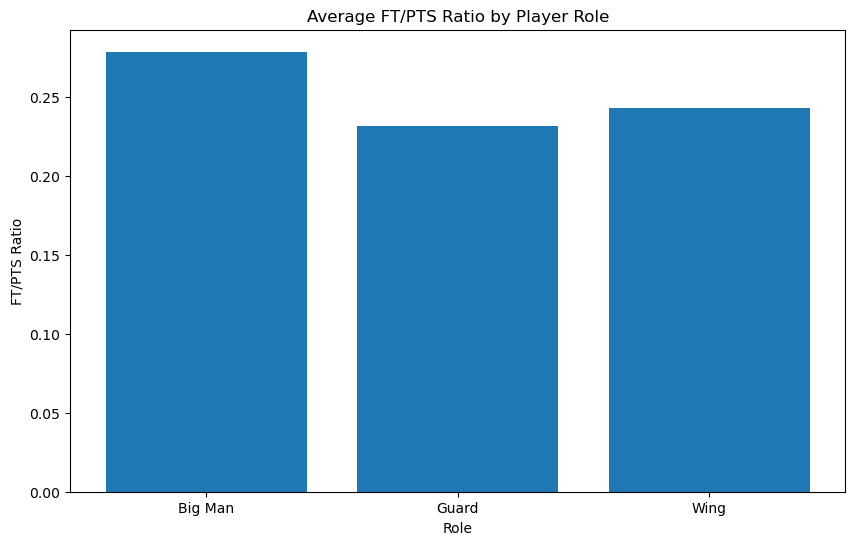

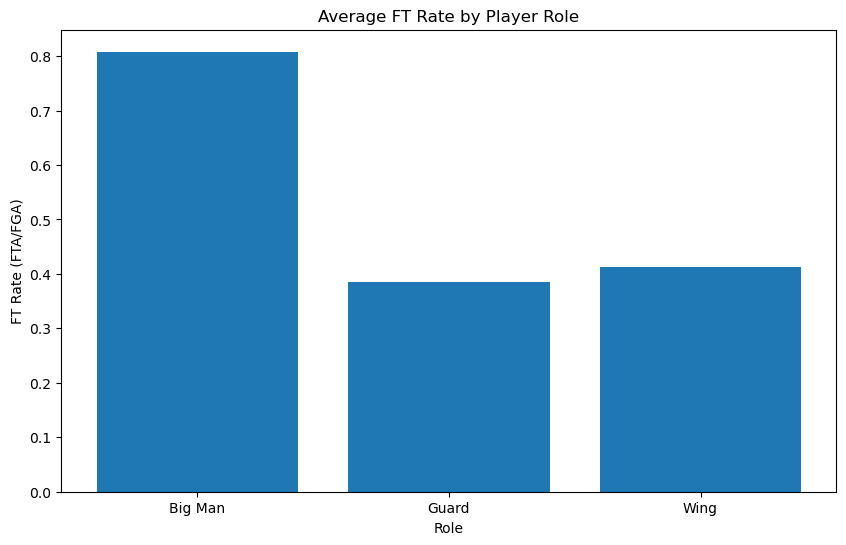

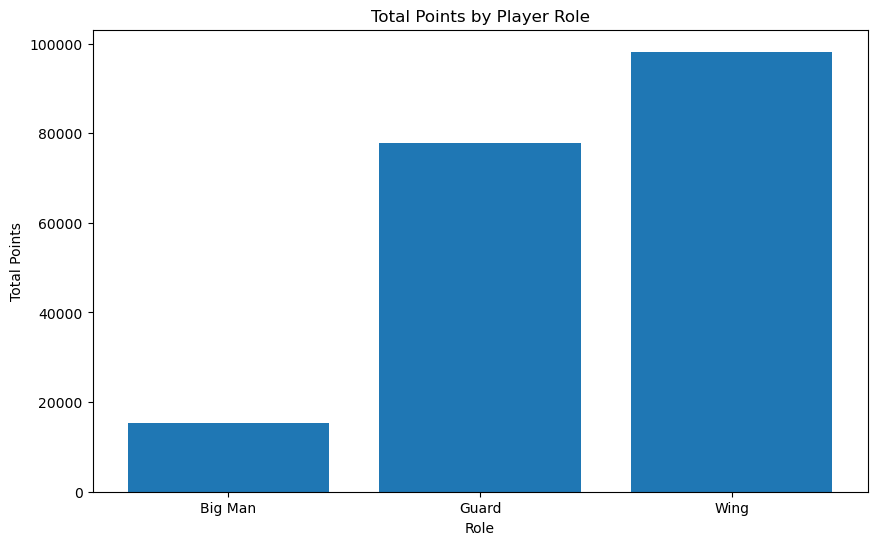

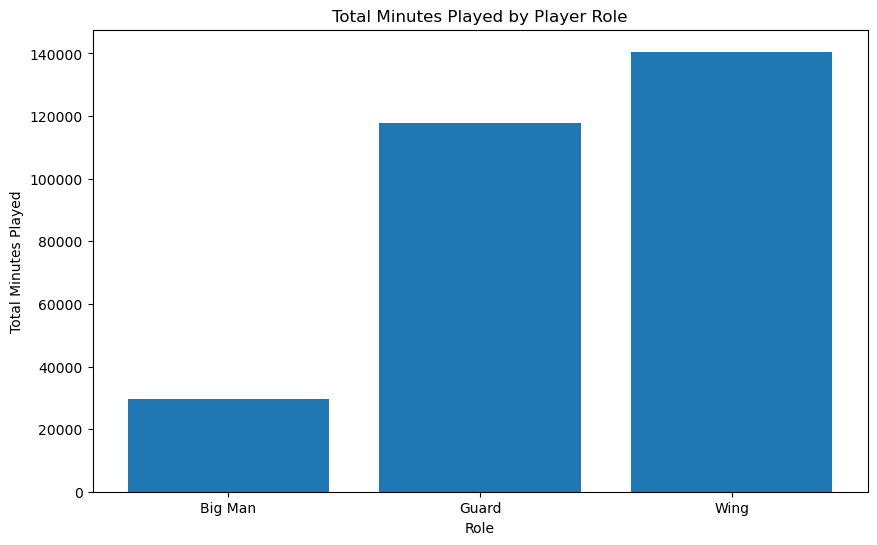

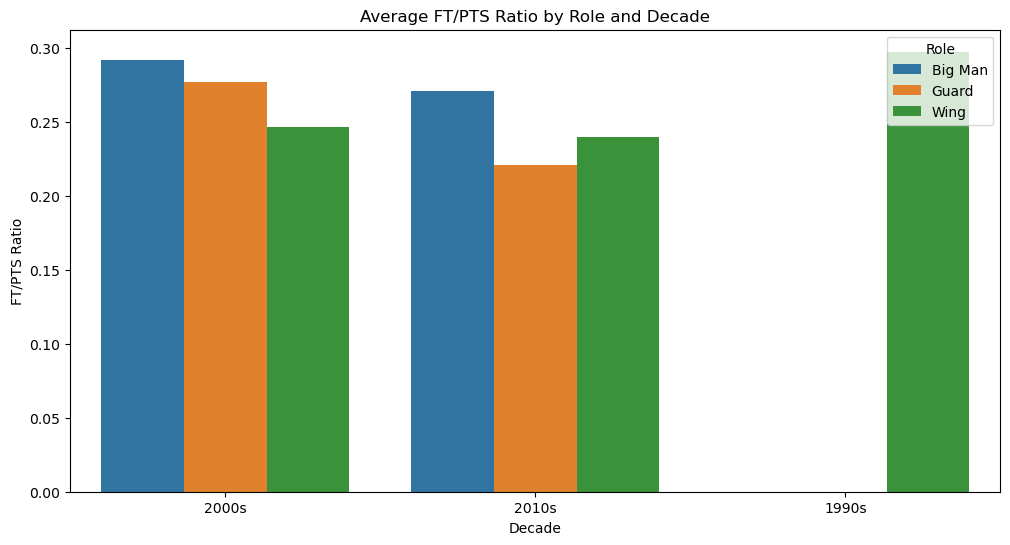

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('NBA_Stats_1950_2021_raw.csv')

# Filter data to focus on the period since the ABA-NBA merger in 1976
data_filtered = data[data['Year'] >= 1976].copy()

# Calculate FT/PTS ratio and handle missing data
data_filtered['FT_PTS_ratio'] = data_filtered['FTM'] / data_filtered['PTS']

# Remove rows where FT_PTS_ratio could not be calculated due to missing FTM or PTS values
data_filtered = data_filtered.dropna(subset=['FT_PTS_ratio', 'PTS', 'MIN'])

# Define separate data for post-2000 and apply minimum points thresholds for analysis
data_post_2000 = data_filtered[data_filtered['Year'] >= 2000]
data_1976_2021_1000pts = data_filtered[data_filtered['PTS'] >= 1000]
data_2000_2021_1000pts = data_post_2000[data_post_2000['PTS'] >= 1000]

# Find top players in each period based on FT_PTS_ratio for visualizations
top_1976_2021 = data_1976_2021_1000pts.sort_values(by='FT_PTS_ratio', ascending=False).head(10)
top_2000_2021 = data_2000_2021_1000pts.sort_values(by='FT_PTS_ratio', ascending=False).head(10)

# Generate visualizations for top players based on FT_PTS ratio for both periods

# 1. Top FT/PTS Ratio since 1976
plt.figure(figsize=(12, 6))
plt.bar(top_1976_2021['Player'], top_1976_2021['FT_PTS_ratio'], color='blue')
plt.title('Top Players by FT/PTS Ratio (1976-2021)')
plt.xlabel('Player')
plt.ylabel('FT/PTS Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Top FT/PTS Ratio since 2000
plt.figure(figsize=(12, 6))
plt.bar(top_2000_2021['Player'], top_2000_2021['FT_PTS_ratio'], color='green')
plt.title('Top Players by FT/PTS Ratio (2000-2021)')
plt.xlabel('Player')
plt.ylabel('FT/PTS Ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Filter data to focus on the period since the ABA-NBA merger in 1976
data_filtered = data[(data['Year'] >= 1976) & (data['PTS'] >= 1000)].copy()

# Calculate FT/PTS ratio and FT Rate (FTA/FGA), handling cases with missing data
data_filtered['FT_PTS_ratio'] = data_filtered['FTM'] / data_filtered['PTS']
data_filtered['FT_Rate'] = data_filtered['FTA'] / data_filtered['FGA']
data_filtered = data_filtered.dropna(subset=['FT_PTS_ratio', 'FT_Rate', 'PTS', 'MIN'])

# Function to categorize players into roles based on historical knowledge
def assign_role(player_name):
    big_men = ["Dwight Howard", "Shaquille O'Neal", "Moses Malone", "Hakeem Olajuwon"]
    wings = ["LeBron James", "Kobe Bryant", "Kevin Durant", "Jimmy Butler", "Scottie Pippen"]
    guards = ["Stephen Curry", "Allen Iverson", "Chris Paul", "James Harden", "Dwyane Wade"]
    
    if player_name in big_men:
        return "Big Man"
    elif player_name in wings:
        return "Wing"
    elif player_name in guards:
        return "Guard"
    else:
        return "Unknown"

# Apply role assignment to filtered dataset
data_filtered['Role'] = data_filtered['Player'].apply(assign_role)
role_data = data_filtered[data_filtered['Role'] != "Unknown"]

# Group by role and calculate metrics
role_summary = role_data.groupby('Role').agg({
    'FT_PTS_ratio': 'mean',
    'FT_Rate': 'mean',
    'PTS': 'sum',
    'MIN': 'sum'
}).reset_index()

# Visualization: Average FT/PTS Ratio by Role
plt.figure(figsize=(10, 6))
plt.bar(role_summary['Role'], role_summary['FT_PTS_ratio'])
plt.title('Average FT/PTS Ratio by Player Role')
plt.xlabel('Role')
plt.ylabel('FT/PTS Ratio')
plt.show()

# Visualization: Average FT Rate by Role
plt.figure(figsize=(10, 6))
plt.bar(role_summary['Role'], role_summary['FT_Rate'])
plt.title('Average FT Rate by Player Role')
plt.xlabel('Role')
plt.ylabel('FT Rate (FTA/FGA)')
plt.show()

# Visualization: Total Points by Role
plt.figure(figsize=(10, 6))
plt.bar(role_summary['Role'], role_summary['PTS'])
plt.title('Total Points by Player Role')
plt.xlabel('Role')
plt.ylabel('Total Points')
plt.show()

# Visualization: Total Minutes Played by Role
plt.figure(figsize=(10, 6))
plt.bar(role_summary['Role'], role_summary['MIN'])
plt.title('Total Minutes Played by Player Role')
plt.xlabel('Role')
plt.ylabel('Total Minutes Played')
plt.show()


# Filter data to focus on the period since the ABA-NBA merger in 1976
data_filtered = data[(data['Year'] >= 1976) & (data['PTS'] >= 1000)].copy()

# Calculate FT/PTS ratio and assign roles based on player names
data_filtered['FT_PTS_ratio'] = data_filtered['FTM'] / data_filtered['PTS']
data_filtered.dropna(subset=['FT_PTS_ratio'], inplace=True)

# Function to categorize players into roles
def assign_role(player_name):
    big_men = ["Dwight Howard", "Shaquille O'Neal", "Moses Malone", "Hakeem Olajuwon"]
    wings = ["LeBron James", "Kobe Bryant", "Kevin Durant", "Jimmy Butler", "Scottie Pippen"]
    guards = ["Stephen Curry", "Allen Iverson", "Chris Paul", "James Harden", "Dwyane Wade"]
    
    if player_name in big_men:
        return "Big Man"
    elif player_name in wings:
        return "Wing"
    elif player_name in guards:
        return "Guard"
    else:
        return "Unknown"

# Apply role assignment and assign decades
data_filtered['Role'] = data_filtered['Player'].apply(assign_role)
data_filtered = data_filtered[data_filtered['Role'] != "Unknown"]

def assign_decade(year):
    if 1976 <= year <= 1979:
        return "1976-1979"
    elif 1980 <= year <= 1989:
        return "1980s"
    elif 1990 <= year <= 1999:
        return "1990s"
    elif 2000 <= year <= 2009:
        return "2000s"
    elif 2010 <= year <= 2021:
        return "2010s"
    else:
        return "Unknown"

data_filtered['Decade'] = data_filtered['Year'].apply(assign_decade)

# Group by Role and Decade, calculating mean FT/PTS ratio for visualization
role_decade_summary = data_filtered.groupby(['Role', 'Decade']).agg({
    'FT_PTS_ratio': 'mean'
}).reset_index()

# Plot FT/PTS ratio by Role and Decade
plt.figure(figsize=(12, 6))
sns.barplot(data=role_decade_summary, x='Decade', y='FT_PTS_ratio', hue='Role')
plt.title('Average FT/PTS Ratio by Role and Decade')
plt.xlabel('Decade')
plt.ylabel('FT/PTS Ratio')
plt.legend(title='Role')
plt.show()
